# P9 - Classification Report & Autodiff Demo

We will showcase **Automatic Differentiation** using the small `autodiff` implementation we have provided in Assignment 2.

# Classification Report

In [1]:
import numpy as np

In [2]:
y_pred = 13*[0] + 2*[1] + 4*[0] + 1*[1] + 4*[2] + 1*[0] + 5*[2] + 9*[3] + 1*[2] + 5*[3]
y_true = 15*[0] + 5*[1] + 10*[2] + 15*[3]

In [3]:
np.array(y_pred)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3])

In [4]:
np.array(y_true)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [5]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.33      0.20      0.25         5
           2       0.90      0.90      0.90        10
           3       1.00      0.93      0.97        15

    accuracy                           0.82        45
   macro avg       0.74      0.73      0.73        45
weighted avg       0.81      0.82      0.81        45



# Autodiff

## Forward Pass

![lecture-forward](./forward.png)

In [6]:
from autodiff.scalar import Scalar

x = Scalar(2.0)
a = x**2
b = a.exp()
c = b + a
d = c**0.5
e = c.cos()
f = d + e

In [7]:
print(f'x: {x}')

x: Scalar(value=2.0, grad=0)


In [8]:
for name, var in zip('abcdef', [a,b,c,d,e,f]):
    print(f'{name}: {var}')

a: Scalar(value=4.0, grad=0)
b: Scalar(value=54.598150033144236, grad=0)
c: Scalar(value=58.598150033144236, grad=0)
d: Scalar(value=7.654942849763429, grad=0)
e: Scalar(value=-0.46061321417757406, grad=0)
f: Scalar(value=7.194329635585855, grad=0)


## Backward Pass

We wish to compute $$ \frac{\partial f}{\partial x}\bigg|_{x=2.0} $$

Let's compute all derivatives $$\frac{\partial f}{\partial f}\bigg|_{f=7.19} \qquad \frac{\partial f}{\partial e}\bigg|_{e=-0.46} \qquad \frac{\partial f}{\partial d}\bigg|_{d=7.65} \qquad \frac{\partial f}{\partial c}\bigg|_{c=58.60} \qquad \frac{\partial f}{\partial b}\bigg|_{b=54.60} \qquad \frac{\partial f}{\partial a}\bigg|_{a=4.0}$$

In [9]:
f.backward()

In [10]:
# Let's print the variables again
print(f'x: {x}')
print(20*'-')

for name, var in zip('abcdef', [a,b,c,d,e,f]):
    print(f'{name}: {var}')

x: Scalar(value=2.0, grad=-182.86980730598307)
--------------------
a: Scalar(value=4.0, grad=-45.71745182649577)
b: Scalar(value=54.598150033144236, grad=-0.8222836874831592)
c: Scalar(value=58.598150033144236, grad=-0.8222836874831592)
d: Scalar(value=7.654942849763429, grad=1)
e: Scalar(value=-0.46061321417757406, grad=1)
f: Scalar(value=7.194329635585855, grad=1)


![lecture-backward](./backward.png)

## Visualize Computational Graph

In [ ]:
# %pip install graphviz

In [11]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ value %.4f | grad %.4f }" % (n.value, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

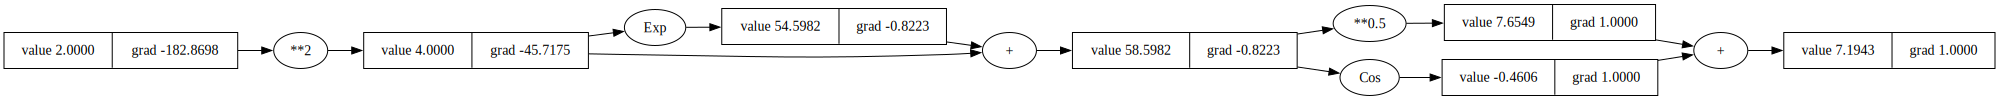

In [12]:
draw_dot(f)

## Other AutoDiff Frameworks

Other popular automatic differentiation frameworks include:
+ [PyTorch](https://pytorch.org/)
+ [TensorFlow](https://www.tensorflow.org/)
+ [JAX](https://jax.readthedocs.io/)

Let's use `pytorch` to build the same computational graph and then use its autodiff framework to compute gradients!

In [13]:
import torch

x = torch.tensor(2.0, requires_grad=True)
a = x**2
b = a.exp()
c = b + a
d = c**0.5
e = c.cos()
f = d + e

In [14]:
for name, var in zip('abcdef', [a,b,c,d,e,f]):
    var.retain_grad() # By default, pytorch doesn't save the gradients in var.grad if var is an intermediate tensor
    print(f'{name}: value={var}, grad={var.grad}')

a: value=4.0, grad=None
b: value=54.598148345947266, grad=None
c: value=58.598148345947266, grad=None
d: value=7.654942989349365, grad=None
e: value=-0.4606117308139801, grad=None
f: value=7.194331169128418, grad=None


In [15]:
f.backward()

In [16]:
print(f'x: value={x}, grad={x.grad}')
print(20*'-')

for name, var in zip('abcdef', [a,b,c,d,e,f]):
    print(f'{name}: value={var}, grad={var.grad}')

x: value=2.0, grad=-182.86997985839844
--------------------
a: value=4.0, grad=-45.71749496459961
b: value=54.598148345947266, grad=-0.822284460067749
c: value=58.598148345947266, grad=-0.822284460067749
d: value=7.654942989349365, grad=1.0
e: value=-0.4606117308139801, grad=1.0
f: value=7.194331169128418, grad=1.0
